In [1]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib  inline

/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
daisy = 'flowers/daisy/*.jpg'
dandalion = 'flowers/dandelion/*.jpg'
rose = 'flowers/rose/*.jpg'
sunflower = 'flowers/sunflower/*.jpg'
tulip = 'flowers/tulip/*.jpg'

In [3]:
import glob
import os

def read_img(path, label):
    image_stack = []
    labels = []
    #name = str(path)
    for img in glob.glob(path):
        #f = img.find("/")+1
        
        labels.append(label)
        image = cv2.imread(img)
        img_res = cv2.resize(image, (128, 128), cv2.INTER_LINEAR)
        image_stack.append(img_res)
        #image_stack = np.asarray(image_stack)
    return (image_stack), labels


In [4]:
data = {0:'flowers/daisy/*.jpg', 1:'flowers/dandelion/*.jpg', 2:'flowers/rose/*.jpg', 
        3:'flowers/sunflower/*.jpg',4:'flowers/tulip/*.jpg' }
#targets = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

dataset = []
labels = []
for key, path in data.items():
    images, label = read_img(path, key)
    dataset += images
    labels += label
dataset = np.asarray(dataset)
labels = np.asarray(labels)

In [5]:
print('Dataset shape:',dataset.shape)
print('Labels shape:',labels.shape)

Dataset shape: (4323, 128, 128, 3)
Labels shape: (4323,)


In [6]:
target = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

In [7]:
from sklearn.model_selection import train_test_split
from random import *

In [21]:
X_tr, X_te, Y_tr, Y_te = train_test_split(dataset, labels, test_size = 0.1, random_state=0)

In [22]:
Y_tr.shape

(3890,)

In [10]:
import matplotlib.gridspec as gridspec
def plot_dataset(X, Y, target, samples):
    l = len(X)
    n = 0
    gs = gridspec.GridSpec(10, 6)
    plt.figure(figsize=(25, 30))
    for i in range(samples):
        ax = plt.subplot(gs[n])
        index = randint(1, l)
        image = X[index]
        label = target[Y[index]]
        n+=1
        plt.text(0, -2, label)
        plt.imshow(image)
    #plt.imshow()

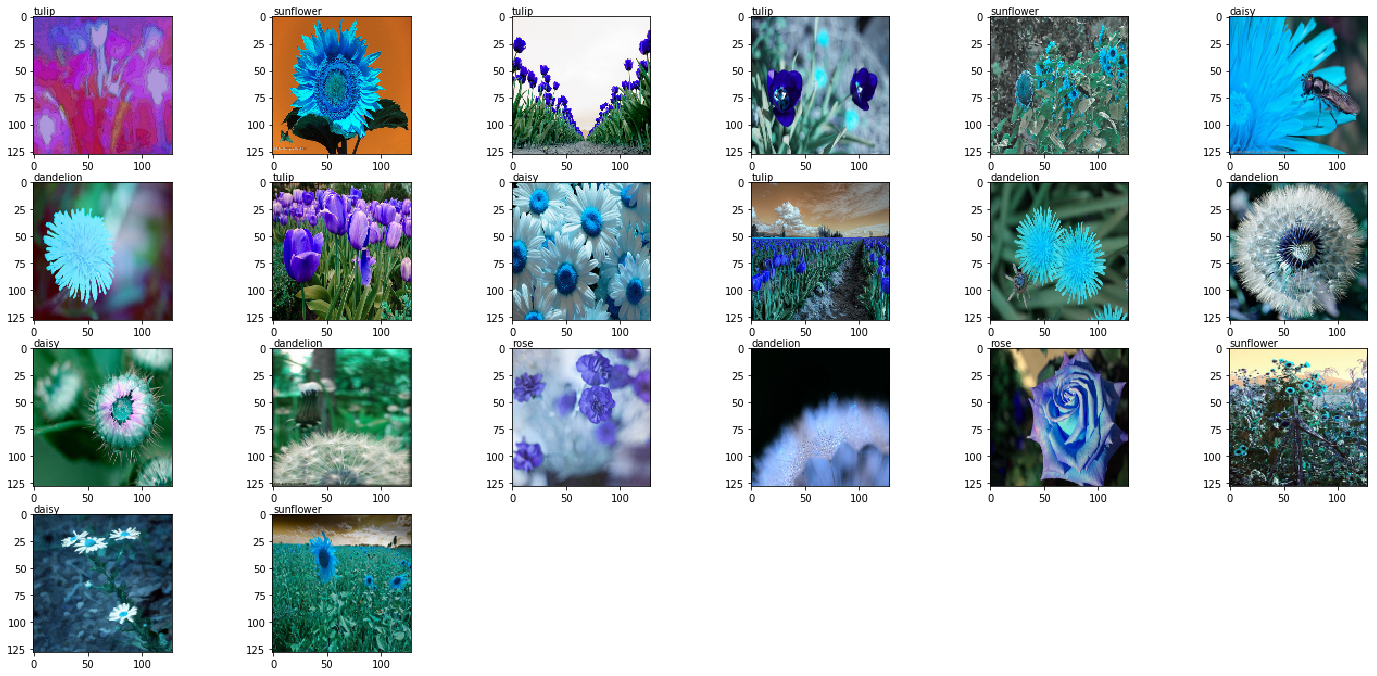

In [11]:
plot_dataset(X_tr, Y_tr, target, 20)

In [12]:
#Buiding my model
from IPython.display import Image
Image(url='http://www.nallatech.com/wp-content/uploads/CNN-Figure-02.png')

In [23]:
from keras.layers import MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D

In [19]:
def normalization(img):
    img = cv2.normalize(img, img, 50, 200, cv2.NORM_MINMAX)
    cv2.medianBlur(img, 3)
    return img

In [20]:
l = len(X_tr)
l2 = len(X_te)
for i in range(l):
    X_tr[i] = normalization(X_tr[i])
for i in range(l2):
    X_te[i] = normalization(X_te[i])

In [24]:
def CNN():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_tr.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes))
   
    
    return model
        
    

In [33]:

learning_rate = 6e-4
feat = X_tr.shape[1]
n_classes = len(set(Y_tr))
channels = X_tr.shape[3]
Y_tr = to_categorical(Y_tr, n_classes)
Y_te = to_categorical(Y_te, n_classes)
model = CNN()

In [34]:
 model.add(Activation('softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 64)      36928     
__________

In [36]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [37]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                        height_shift_range=0.08, zoom_range=0.08)

In [38]:
test_gen = ImageDataGenerator()
batch_size = 128

In [39]:
train_generator = gen.flow(X_tr, Y_tr, batch_size=batch_size)
test_generator = test_gen.flow(X_te, Y_te, batch_size=batch_size)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=X_tr.shape[0]//batch_size, epochs=15, 
                   validation_data=test_generator, validation_steps=X_te.shape[0]//batch_size)

Epoch 1/15
18/30 [=================>............] - ETA: 5:24 - loss: 12.4647 - acc: 0.2120